
Analiză completă a distribuției imaginilor...


Processing darkspots: 100%|██████████| 250/250 [00:00<00:00, 996.35it/s] 



Distribuția pe categorii:
-------------------------
            Count  Percentage
acnes         250        25.0
blackheads    250        25.0
wrinkles      250        25.0
darkspots     250        25.0

Statistici dimensiuni imagini:
-----------------------------
       height    width  aspect_ratio
mean   387.32   479.56          1.32
min     94.00    98.00          0.44
max   3647.00  3647.00          3.06

Statistici culori (valori medii pe canale BGR):
-----------------------------------------------
       height    width  aspect_ratio
mean   387.32   479.56          1.32
min     94.00    98.00          0.44
max   3647.00  3647.00          3.06


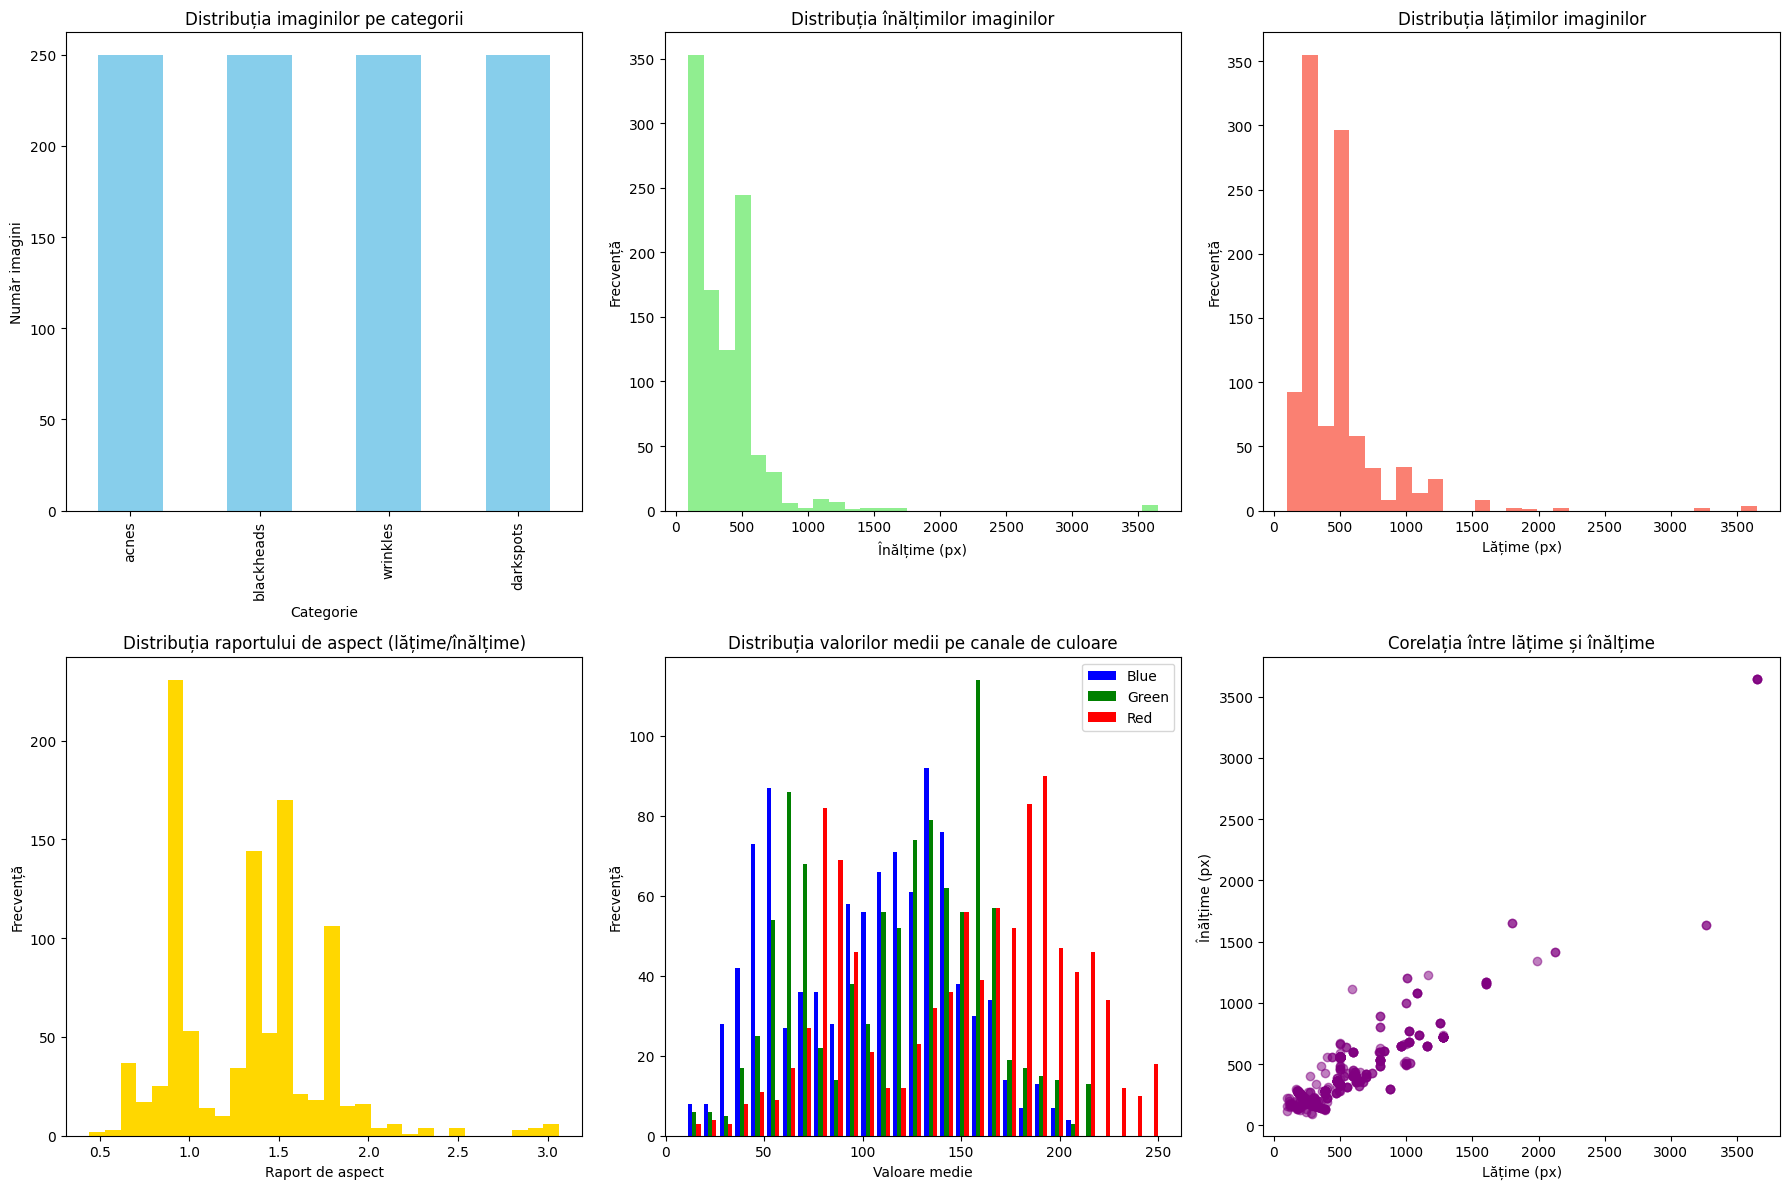

In [4]:
import cv2
import numpy as np
import pandas as pd
from collections import defaultdict
import matplotlib.pyplot as plt
from tqdm import tqdm

def analyze_image_distribution(data_path):
    size_stats = defaultdict(list)
    color_stats = defaultdict(list)
    category_counts = defaultdict(int)

    for category in os.listdir(data_path):
        category_path = os.path.join(data_path, category)
        if os.path.isdir(category_path):
            for img_file in tqdm(os.listdir(category_path), desc=f'Processing {category}'):
                if img_file.lower().endswith(('.jpg', '.jpeg', '.png')):
                    img_path = os.path.join(category_path, img_file)
                    img = cv2.imread(img_path)

                    if img is not None:
                        height, width, channels = img.shape
                        size_stats['height'].append(height)
                        size_stats['width'].append(width)
                        size_stats['aspect_ratio'].append(width/height)

                        mean_color = cv2.mean(img)[:3]
                        color_stats['mean_B'].append(mean_color[0])
                        color_stats['mean_G'].append(mean_color[1])
                        color_stats['mean_R'].append(mean_color[2])

                        category_counts[category] += 1

    return size_stats, color_stats, category_counts

print("\nAnaliză completă a distribuției imaginilor...")
size_stats, color_stats, category_counts = analyze_image_distribution(data_path)

print("\nDistribuția pe categorii:")
print("-------------------------")
df_categories = pd.DataFrame.from_dict(category_counts, orient='index', columns=['Count'])
df_categories['Percentage'] = (df_categories['Count'] / df_categories['Count'].sum()) * 100
print(df_categories)

print("\nStatistici dimensiuni imagini:")
print("-----------------------------")
df_sizes = pd.DataFrame(size_stats)
print(df_sizes.describe().loc[['mean', 'min', 'max']].round(2))

print("\nStatistici culori (valori medii pe canale BGR):")
print("-----------------------------------------------")
df_colors = pd.DataFrame(color_stats)
print(df_sizes.describe().loc[['mean', 'min', 'max']].round(2))

plt.figure(figsize=(18, 12))

plt.subplot(2, 3, 1)
df_categories['Count'].plot(kind='bar', color='skyblue')
plt.title('Distribuția imaginilor pe categorii')
plt.xlabel('Categorie')
plt.ylabel('Număr imagini')

plt.subplot(2, 3, 2)
plt.hist(size_stats['height'], bins=30, color='lightgreen')
plt.title('Distribuția înălțimilor imaginilor')
plt.xlabel('Înălțime (px)')
plt.ylabel('Frecvență')

plt.subplot(2, 3, 3)
plt.hist(size_stats['width'], bins=30, color='salmon')
plt.title('Distribuția lățimilor imaginilor')
plt.xlabel('Lățime (px)')
plt.ylabel('Frecvență')

plt.subplot(2, 3, 4)
plt.hist(size_stats['aspect_ratio'], bins=30, color='gold')
plt.title('Distribuția raportului de aspect (lățime/înălțime)')
plt.xlabel('Raport de aspect')
plt.ylabel('Frecvență')

plt.subplot(2, 3, 5)
plt.hist([color_stats['mean_B'], color_stats['mean_G'], color_stats['mean_R']],
         bins=30, color=['blue', 'green', 'red'], label=['Blue', 'Green', 'Red'])
plt.title('Distribuția valorilor medii pe canale de culoare')
plt.xlabel('Valoare medie')
plt.ylabel('Frecvență')
plt.legend()

plt.subplot(2, 3, 6)
plt.scatter(size_stats['width'], size_stats['height'], alpha=0.5, color='purple')
plt.title('Corelația între lățime și înălțime')
plt.xlabel('Lățime (px)')
plt.ylabel('Înălțime (px)')

plt.tight_layout()
plt.show()